## Dimensinality reduction via PCA
- Remeber to first **scale** the feature if necessary before apply PCA
- `grain` dataset

In [12]:
from scipy.stats           import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline
from pathlib               import Path

import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns
import numpy             as np
import os

In [13]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


### Load Data 
- **A**: area; 
- **P**: perimeter; 
- $C = \frac{4 \pi A}{P^{2}}$ : compactness; 
- **L1**: length of kernel; 
- **W**:  width of kernel, 
- **AC**: asymmetry coefficient 
- **L2**: length of kernel groove. 
- **y** : wine category

In [14]:
path_dataset = path_root / 'dataset/grains/seeds.csv'
grains = pd.read_csv(path_dataset, header = None, names = ['A', 'P', 'C', 'L1', 'W', 'AC', 'L2', 'y'])
grains.head(3)

,A,P,C,L1,W,AC,L2,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [15]:
# split predictors with target variable
X = grains.drop('y', axis = 1)
y = grains['y']
# show distribution of y
grains['y'].value_counts(dropna = False)

3    70
2    70
1    70
Name: y, dtype: int64

### Inspect Correlation

o Correlation L1 ~ W = 0.86


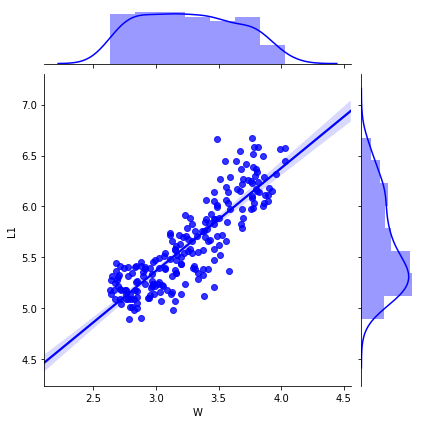

In [16]:
# Assign the 0th column of grains: width
width  = grains['W']
# Assign the 1st column of grains: length
length = grains['L1']
# Scatter plot width vs length
sns.jointplot(x = 'W', y = 'L1', data = grains, kind = 'reg', color = 'b')
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)
# Display the correlation
print(f"o Correlation L1 ~ W = {round(correlation, 2)}")

### Decorrelate the grain measurements with PCA

In [17]:
# Create PCA instance: model
model = PCA()
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

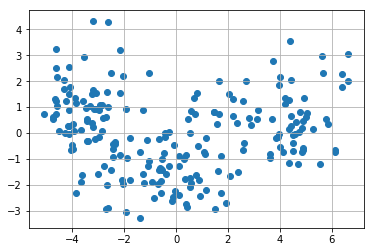

o Correlation L1 ~ W = 0.0


In [18]:
xs = pca_features[:,0]
ys = pca_features[:,1]
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.grid()
plt.show()
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
# Display the correlation
print(f"o Correlation L1 ~ W = {round(correlation, 2)}")

### First principal component
Get direction in which the data varies the most. 

In [19]:
# Create a PCA instance: model
model = PCA()
# Fit model to points
data = np.transpose(np.vstack((width, length)))
model.fit(data)
# Get the mean of the grain samples: mean
mean = model.mean_
# Get the first principal component: first_pc
first_pc = model.components_[0,:]
# Make a scatter plot of the untransformed points

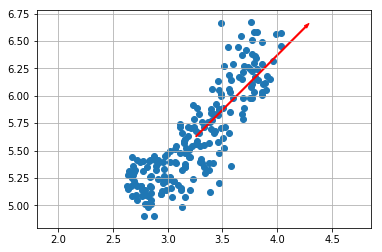

In [20]:
# Plot first_pc as an arrow, starting at mean
plt.figure()
plt.scatter(width, length)
plt.arrow(mean[0], mean[1], 1, 1, color='red', width=0.01)
# Keep axes on same scale
plt.axis('equal')
plt.grid()
plt.show()

In [21]:
# show dimentionality reduction
model = PCA(n_components=1)
model.fit(data)
X_pca = model.transform(data)
print('original shape : '   , data.shape)
print('transformed shape : ', X_pca.shape)
X_new = model.inverse_transform(X_pca)

original shape :  (210, 2)
transformed shape :  (210, 1)


(2.5494333439321673, 4.124767160937023, 4.795023399558499, 6.778976600441501)

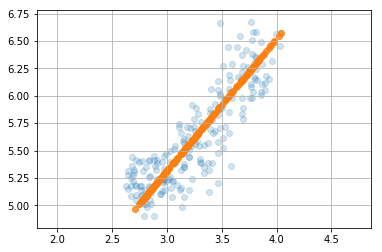

In [22]:
plt.scatter(data[:,0] , data[:,1] , alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha = 0.8)
plt.grid()
plt.axis('equal')

### PCA for visualization

In [23]:
model     = PCA(n_components = 2)
projected = model.fit_transform(X)
print('original shape : '   , X.shape)
print('transformed shape : ', projected.shape)

original shape :  (210, 7)
transformed shape :  (210, 2)


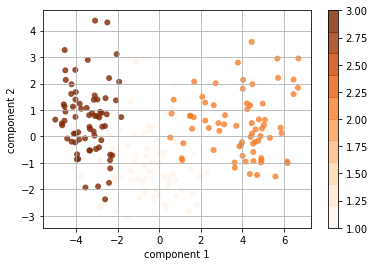

In [24]:
plt.scatter(projected[:,0], projected[:,1], c = y, edgecolor = 'none', alpha = 0.8, cmap = plt.cm.get_cmap('Oranges', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.grid()
plt.colorbar()
plt.show()

### Variance of the PCA features

In [9]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)
# Fit the pipeline to 'samples'
pipeline.fit(grains)
# Plot the explained variances
features = range(pca.n_components_)

C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\giann\Anaconda3\envs\data-science\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


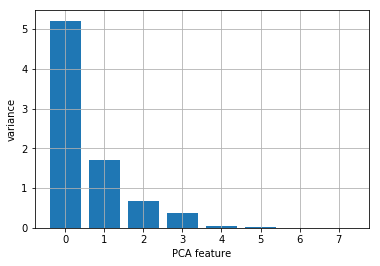

In [10]:
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.grid()
plt.show()

Text(0, 0.5, 'cumulative explained variance')

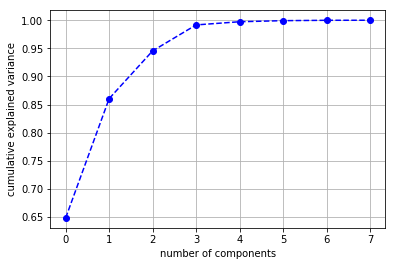

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo--')
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Apply Dimension reduction

(210, 2)


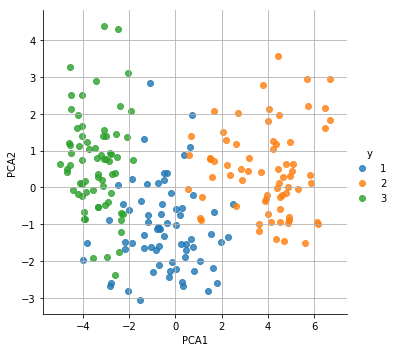

In [67]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)
# Fit the PCA instance to the scaled samples
pca.fit(X)
# Transform the data to two dimension
pca_2D = pca.transform(X)
# Print the shape of pca_features
print(pca_2D.shape)

grains['PCA1'] = pca_2D[:,0]
grains['PCA2'] = pca_2D[:,1]
sns.lmplot('PCA1', 'PCA2', hue = 'y', data = grains, fit_reg = False)
plt.grid()